# Run EHR-ML for LOS

## Read data matrix

In [1]:
import pandas as pd

casestudy1DirPath = '/home/vmadmin/workspace/EHR-Int-Analysis/data/case_study_1'

dataDf = pd.read_csv(casestudy1DirPath + '''/data_matrix_final.csv''')
dataDf

,measurement_date,vitals_ALP_avg,vitals_ALT_avg,vitals_Albumin_avg,vitals_Basophils_avg,vitals_Bicarbonate_avg,vitals_Bilirubin_avg,vitals_Calcium_avg,vitals_Chloride_avg,vitals_Creatinine_avg,...,vitals_SystolicBloodPressureCuff_avg,vitals_DiastolicBloodPressureCuff_avg,vitals_MeanArterialPressureCuff_avg,person_id,los_gt_7_days,los_gt_14_days,los_gt_30_days,los_gt_60_days,los_gt_90_days,admittime
0,2021-05-31,200.000000,25.000000,26.000000,0.04,26.0,11.000000,2.191763,103.388509,85.0,...,121.0,55.0,82.000000,41308,0,0,0,0,0,2021-05-31
1,2020-11-24,58.000000,13.000000,35.000000,0.02,28.0,5.000000,2.220000,102.000000,91.0,...,150.0,87.0,104.000000,56749,1,1,1,0,0,2021-07-30
2,2021-07-29,125.000000,354.000000,30.000000,0.02,29.0,10.000000,2.390000,103.388509,103.0,...,191.0,85.0,122.000000,56749,1,1,1,0,0,2021-07-30
3,2021-07-30,107.000000,264.000000,26.000000,0.03,26.0,8.000000,2.200000,103.000000,101.0,...,132.0,57.0,113.000000,56749,1,1,1,0,0,2021-07-30
4,2021-07-31,127.025688,35.740125,27.285302,0.01,27.0,16.974972,2.220000,106.000000,103.0,...,123.0,56.0,114.000000,56749,1,1,1,0,0,2021-07-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9725,2021-08-17,127.025688,35.740125,27.285302,0.01,33.0,16.974972,2.180000,98.000000,68.0,...,147.0,89.0,84.952515,2526936,1,1,1,0,0,2021-08-15
9726,2021-08-18,188.000000,8.000000,19.000000,0.04,30.0,13.000000,2.150000,101.000000,58.0,...,165.0,85.0,106.000000,2526936,1,1,1,0,0,2021-08-15
9727,2021-08-19,176.000000,8.000000,20.000000,0.02,27.0,15.000000,2.290000,100.000000,53.0,...,177.0,91.0,107.000000,2526936,1,1,1,0,0,2021-08-15
9728,2021-08-21,127.025688,35.740125,27.285302,0.03,29.0,16.974972,2.191763,99.000000,61.0,...,161.0,94.0,113.000000,2526936,1,1,1,0,0,2021-08-15


In [2]:
import re
dataDf = dataDf.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))


In [3]:
casestudy1DirPath = '/home/vmadmin/workspace/EHR-Int-Analysis/data/case_study_1'
dataDf.to_csv(casestudy1DirPath + '''/data_matrix_final.csv''', index=False)

In [9]:
dataDf.shape

(9730, 45)

In [13]:
dataDf[['los_gt_7_days', 'los_gt_14_days', 'los_gt_30_days', 'los_gt_60_days', 'los_gt_90_days']].apply(lambda x: round(sum(x)/dataDf.shape[0]*100, 2))

los_gt_7_days     94.54
los_gt_14_days    89.87
los_gt_30_days    70.24
los_gt_60_days    34.00
los_gt_90_days    20.27
dtype: float64

## WB=30 WA=30

### Run the analysis

In [ ]:
import os


casestudy1DirPath = '/home/vmadmin/workspace/EHR-Int-Analysis/data/case_study_1'

for losDays in [7, 14, 30, 60, 90]:

    print('--------------------------------------------------------------------------------------------------------------------')
    print('losDays: ', losDays)
    print('--------------------------------------------------------------------------------------------------------------------')

    os.system(
        'cd ' + os.environ['EHR_ML_BASE'] + ';'
        +
        '''.venv/bin/python -m ehrml.analysis.StandardisationAnalysis ''' + casestudy1DirPath + '''/data_matrix_final.csv -tc "los_gt_''' + str(losDays) + '''_days" -ic "person_id" -mdc "measurement_date" -adc "admittime" -wb 30 -wa 30 -sp ''' + casestudy1DirPath + '''/results/02.1/los_gt_''' + str(losDays) + '''_days;'''
        )


--------------------------------------------------------------------------------------------------------------------
losDays:  7
--------------------------------------------------------------------------------------------------------------------
2024-12-17 05:01:00,810 - EHR-ML - INFO - Parsing command line arguments
2024-12-17 05:01:00,811 - EHR-ML - INFO - args.data_file: /home/vmadmin/workspace/EHR-Int-Analysis/data/case_study_1/data_matrix_final.csv
2024-12-17 05:01:00,811 - EHR-ML - INFO - args.target_column: los_gt_7_days
2024-12-17 05:01:00,811 - EHR-ML - INFO - args.id_columns: ['person_id']
2024-12-17 05:01:00,811 - EHR-ML - INFO - args.measurement_date_column: measurement_date
2024-12-17 05:01:00,811 - EHR-ML - INFO - args.anchor_date_column: admittime
2024-12-17 05:01:00,811 - EHR-ML - INFO - args.window_before: 30
2024-12-17 05:01:00,811 - EHR-ML - INFO - args.window_after: 30
2024-12-17 05:01:00,811 - EHR-ML - INFO - args.ensemble: False
2024-12-17 05:01:00,811 - EHR-ML - 

### Format results

In [33]:
import json

import pandas as pd

from pathlib import Path

from statistics import mean
from statistics import stdev


casestudy1DirPath = '/home/vmadmin/workspace/EHR-Int-Analysis/data/case_study_1'

result_files = [
    'wb_30_wa_30_original.json',
    # 'wb_30_wa_30_standardised.json',
    # 'wb_30_wa_30_scaled.json',
]

data = []

for losDays in [7, 14, 30, 60, 90]:

    resultsDirPath = casestudy1DirPath + '''/results/02.1/los_gt_''' + str(losDays) + '''_days'''

    for result_file in result_files:
        with open(Path(resultsDirPath, result_file)) as f:
            result = json.load(f)
            print()
            # print('Accuracy: ', round(mean(result['test_accuracy']), 2), '+-', round(stdev(result['test_accuracy']), 3))
            # print('Balanced Accuracy: ', round(mean(result['test_balanced_accuracy']), 2), '+-', round(stdev(result['test_balanced_accuracy']), 3))
            # print('Average Precision: ', round(mean(result['test_average_precision']), 2), '+-', round(stdev(result['test_average_precision']), 3))
            # print('F1: ', round(mean(result['test_f1']), 2), '+-', round(stdev(result['test_f1']), 3))
            # print('ROCAUC: ', round(mean(result['test_roc_auc']), 2), '+-', round(stdev(result['test_roc_auc']), 3))
            # data.append([losDays,
            #     result_file.split('/')[-1].split('.')[0].split('_')[4],
            #     round(mean(result['test_accuracy']), 2), round(stdev(result['test_accuracy']), 3),
            #     round(mean(result['test_balanced_accuracy']), 2), round(stdev(result['test_balanced_accuracy']), 3),
            #     round(mean(result['test_average_precision']), 2), round(stdev(result['test_average_precision']), 3),
            #     round(mean(result['test_f1']), 2), round(stdev(result['test_f1']), 3),
            #     round(mean(result['test_roc_auc']), 2), round(stdev(result['test_roc_auc']), 3),
            #     ])
            data.append(['Accuracy', losDays, round(mean(result['test_accuracy']), 2)])
            data.append(['Balanced Accuracy', losDays, round(mean(result['test_balanced_accuracy']), 2)])
            data.append(['Average Precision', losDays, round(mean(result['test_average_precision']), 2)])
            data.append(['F1', losDays, round(mean(result['test_f1']), 2)])
            data.append(['ROCAUC', losDays, round(mean(result['test_roc_auc']), 2)])

plotDf = pd.DataFrame(data, columns=['Metric', 'LOS', 'Score'])
plotDf

,Metric,LOS,Score
0,Accuracy,7,0.90
1,Balanced Accuracy,7,0.50
2,Average Precision,7,0.94
3,F1,7,0.95
4,ROCAUC,7,0.61
5,Accuracy,14,0.71
6,Balanced Accuracy,14,0.48
7,Average Precision,14,0.80
8,F1,14,0.83
9,ROCAUC,14,0.48


### Plot

<Figure size 1200x600 with 0 Axes>

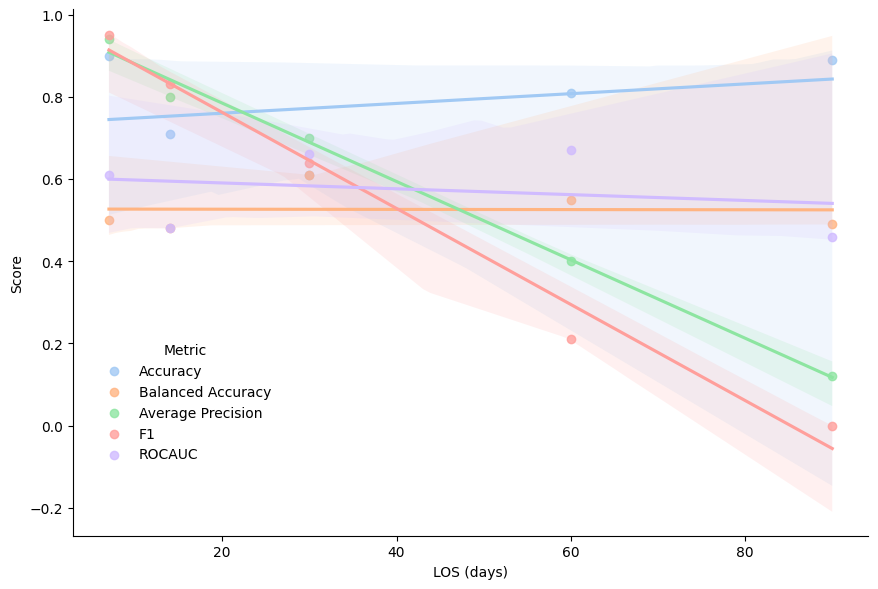

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12,6))
ax = sns.lmplot(
    data=plotDf,
    x='LOS',
    y='Score',
    hue='Metric',
    palette=sns.color_palette("pastel"),
    height=6,
    aspect=1.5,
    # lowess=True,
    # scatter_kws={"s": 0},
    )
ax.set(xlabel='LOS (days)')
ax.set(ylabel='Score')
# ax.set_xticklabels(['', '50-50', '60-40', '70-30', '80-20', '90-10', ''])
sns.move_legend(ax, "lower left", bbox_to_anchor=(.1, .2))
plt.show()
